# Music analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write

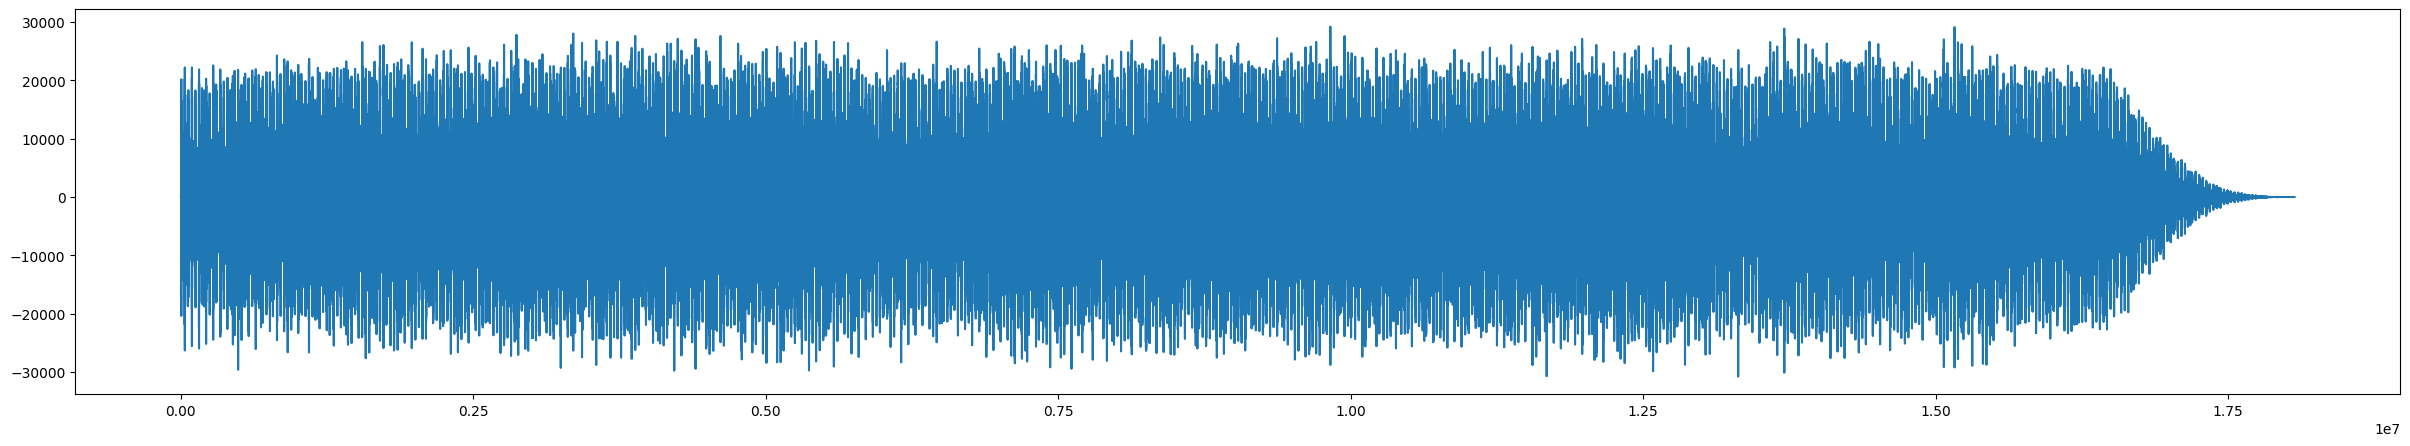

In [2]:
a = read("../datasets/music_sample/nujabes_luvsic.wav")

audio = np.array(a[1][:, 0],dtype=float)

plt.figure(figsize=(30,5))
plt.plot(audio)

In [3]:
a[0]

48000

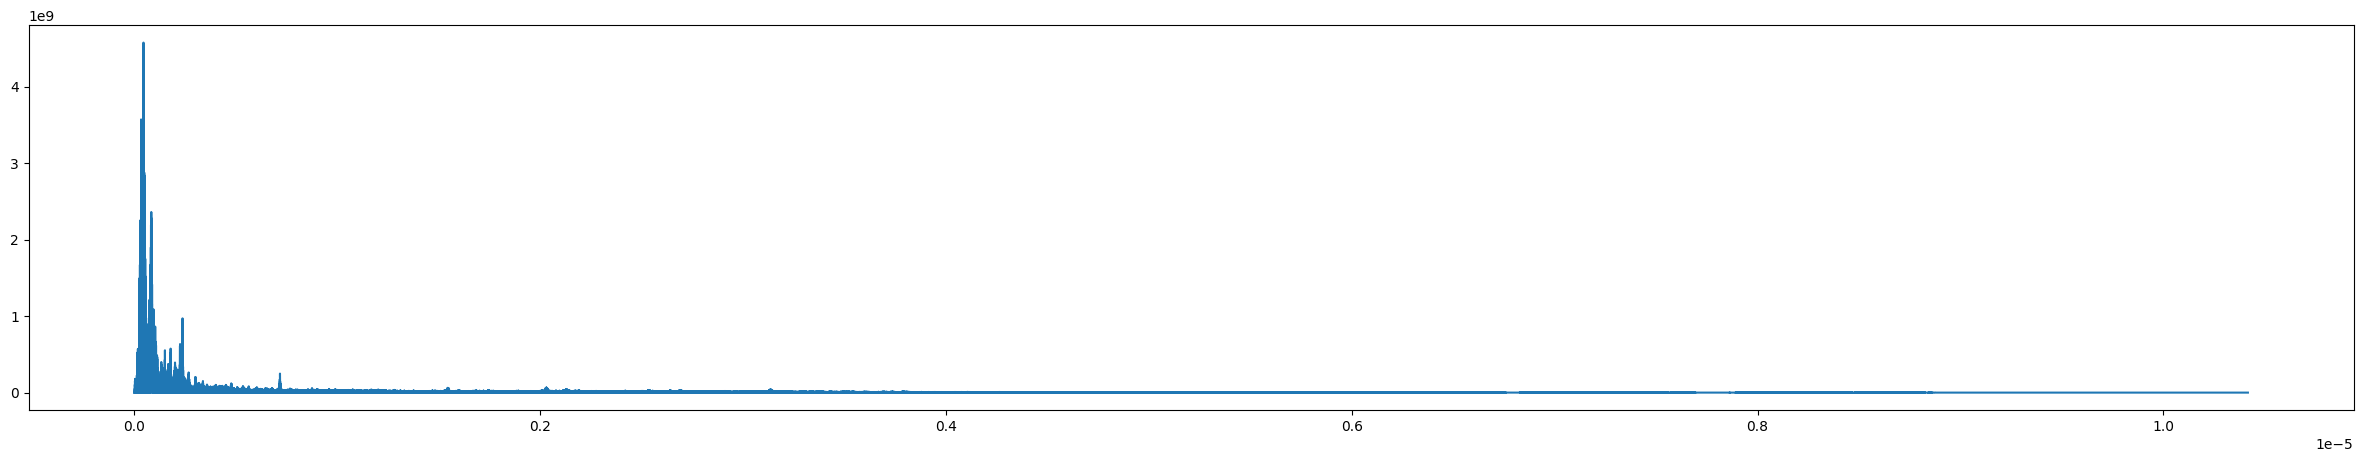

In [4]:
N = len(audio)
fft = np.fft.fft(audio)
fft_freqs = np.fft.fftfreq(N, d=a[0])

plt.figure(figsize=(30,5))
plt.plot(fft_freqs[:N//2], np.abs(fft[:N//2]))

## Filter top $n$% highest frequencies 

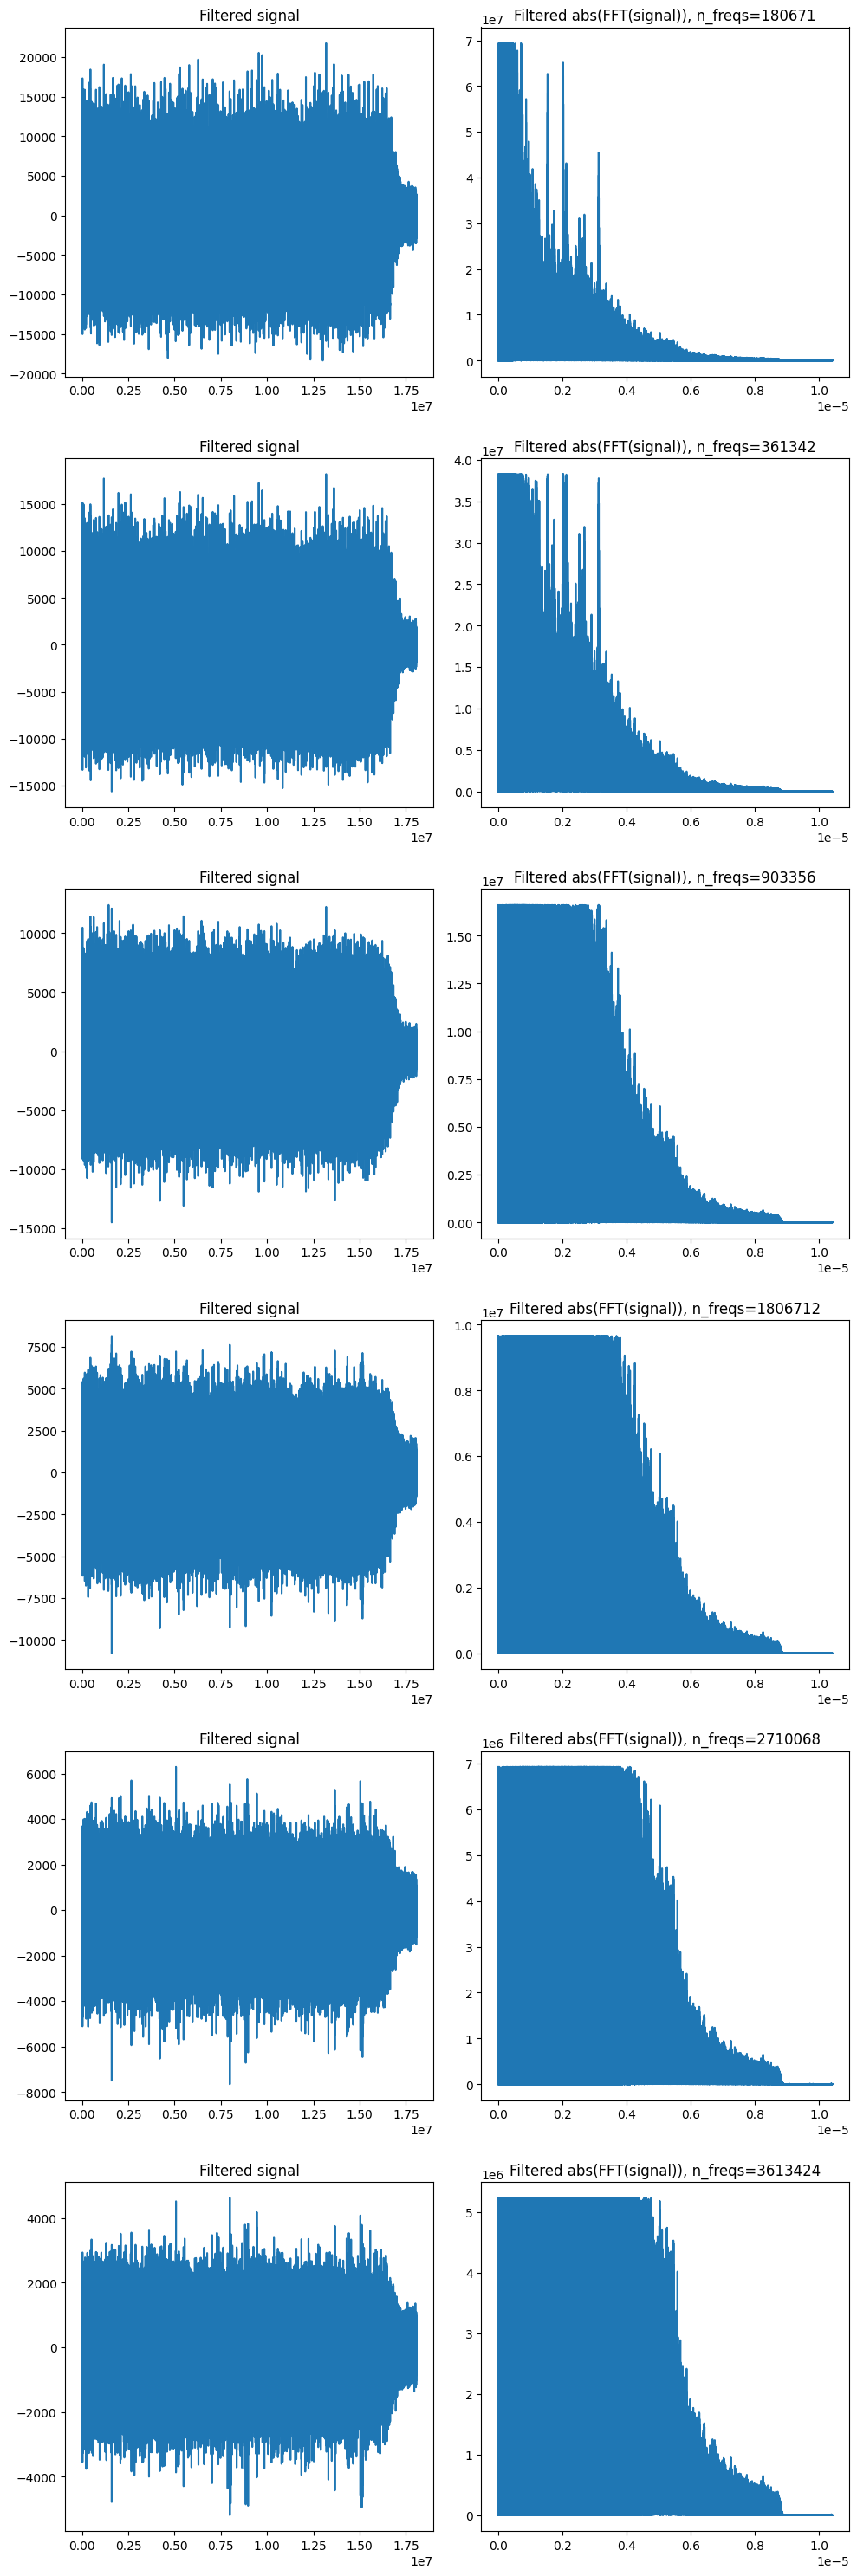

In [20]:
n_percentiles = [1, 2, 5, 10, 15, 20]
filter_n_freqs = [int(N * i/100) for i in n_percentiles]

fig, axes = plt.subplots(len(filter_n_freqs), 2, figsize=(10, 5*len(filter_n_freqs)))

for i, (n_freqs, (ax1, ax2)) in enumerate(zip(filter_n_freqs, axes)):
    
    # copy FFT
    fft_filtered = np.copy(fft)
    
    # filter based on first n_freqs highest magnitude frequencies, set them to zero
    sorted_indices = np.argsort(np.abs(fft_filtered))[::-1]
    fft_filtered[sorted_indices[:n_freqs]] = 0
    
    # inverse FFT
    inv_fft_filtered = np.fft.ifft(fft_filtered).real.astype(np.int16)
    
    # save audio file
    write(f'../datasets/nujabes_luvsic_remove_{n_percentiles[i]}p_freqs.wav', a[0], inv_fft_filtered)
    
    ax1.set_title('Filtered signal')
    ax1.plot(inv_fft_filtered)
    
    ax2.set_title(f'Filtered abs(FFT(signal)), {n_freqs=}')
    ax2.plot(fft_freqs[:N//2], np.abs(fft_filtered[:N//2]))

plt.tight_layout()

## Filter top $n$% lowest frequencies 

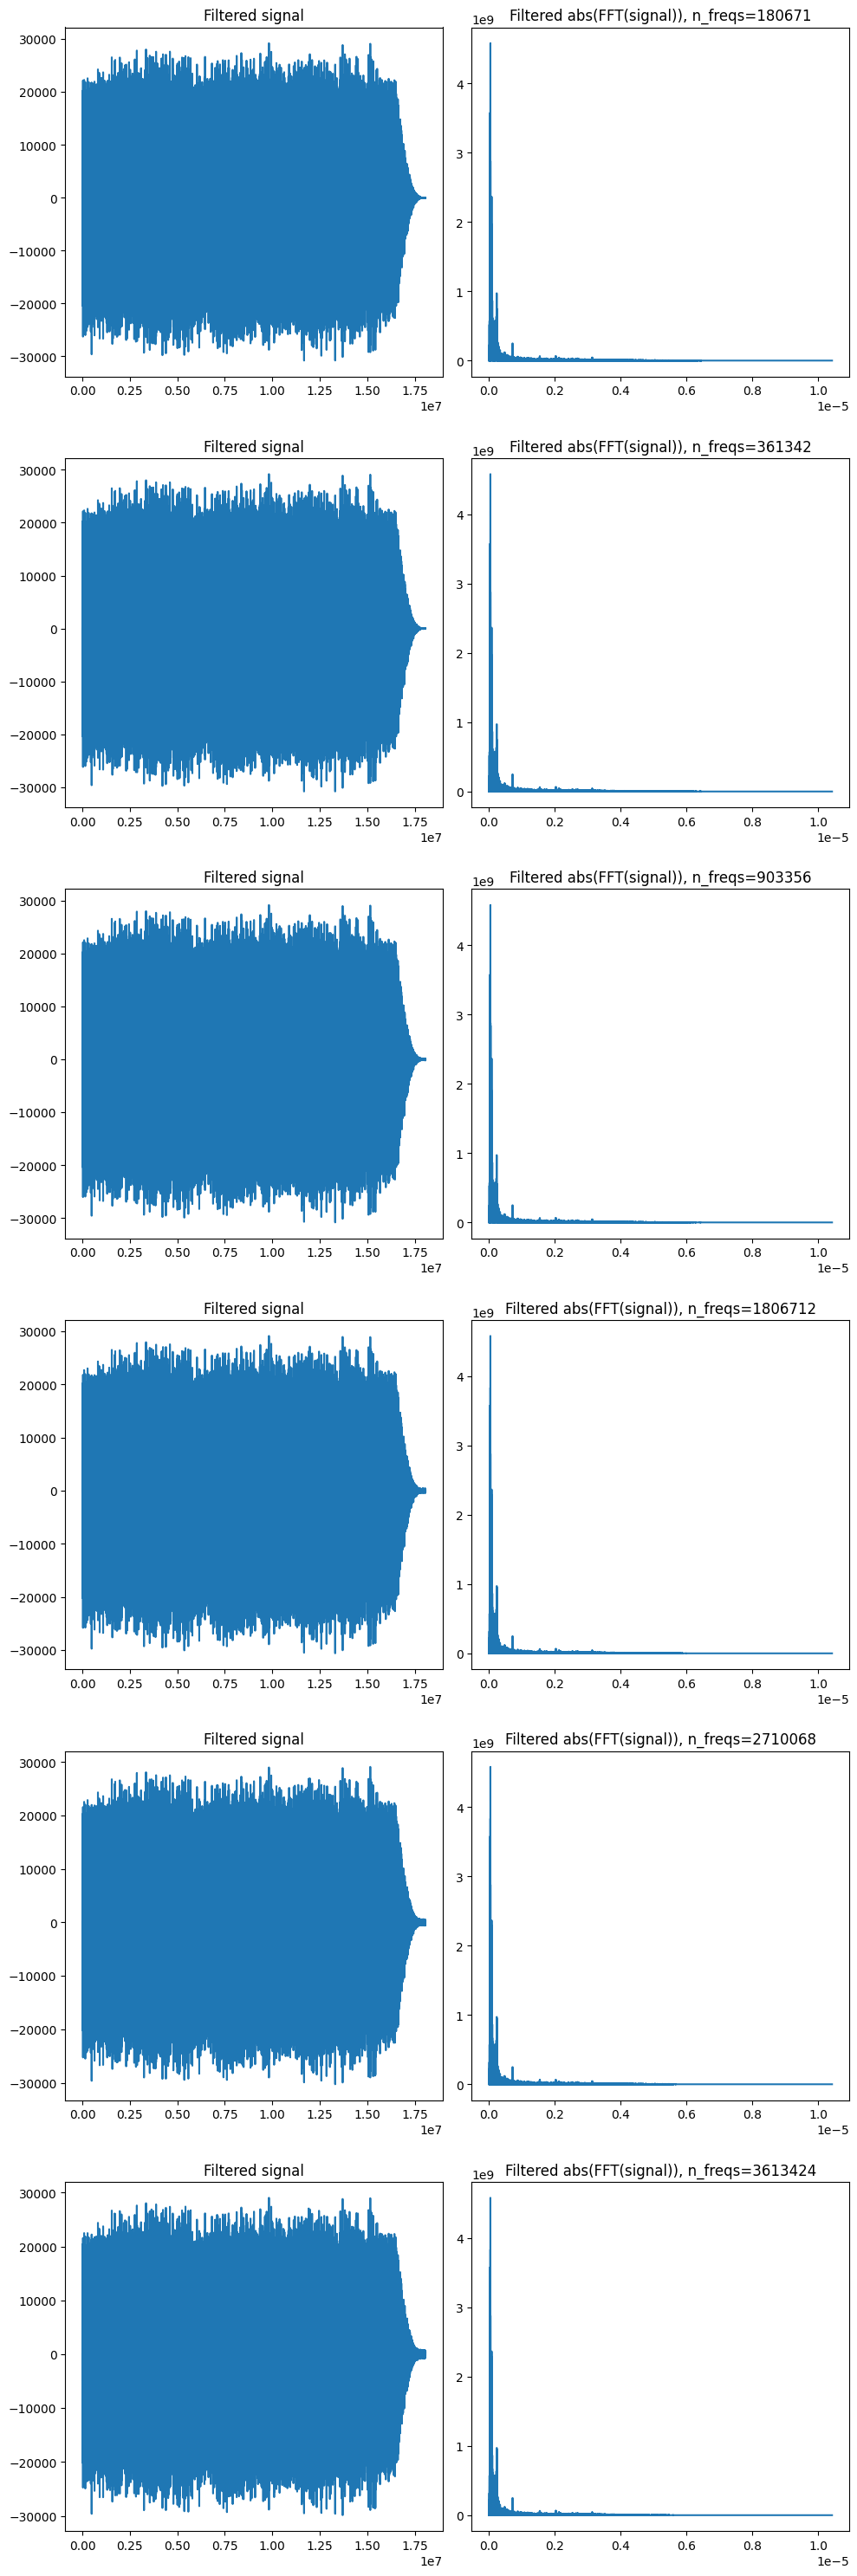

In [21]:
n_percentiles = [1, 2, 5, 10, 15, 20]
filter_n_freqs = [int(N * i/100) for i in n_percentiles]

fig, axes = plt.subplots(len(filter_n_freqs), 2, figsize=(10, 5*len(filter_n_freqs)))

for i, (n_freqs, (ax1, ax2)) in enumerate(zip(filter_n_freqs, axes)):
    
    # copy FFT
    fft_filtered = np.copy(fft)
    
    # filter based on percentage threshold 
    # lowest n_freqs frequencies get filtered out
    fft_filtered[np.abs(fft_filtered) < n_freqs] = 0
    
    # inverse FFT
    inv_fft_filtered = np.fft.ifft(fft_filtered).real.astype(np.int16)
    
    # save audio file
    write(f'../datasets/nujabes_luvsic_filter_{n_percentiles[i]}p_freqs.wav', a[0], inv_fft_filtered)
    
    ax1.set_title('Filtered signal')
    ax1.plot(inv_fft_filtered)
    
    ax2.set_title(f'Filtered abs(FFT(signal)), {n_freqs=}')
    ax2.plot(fft_freqs[:N//2], np.abs(fft_filtered[:N//2]))

plt.tight_layout()

## Spectogram



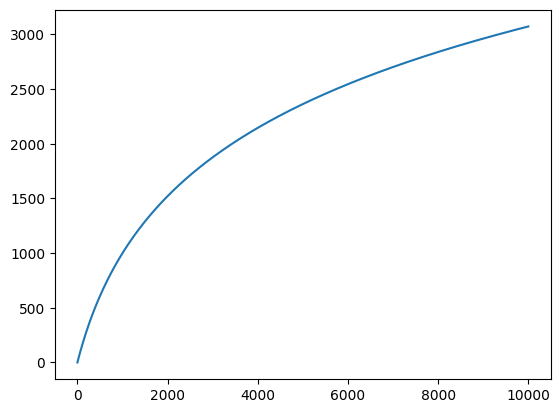

In [91]:

freqs_Hz = np.arange(0, 10000)
mel = 2595.0 * np.log10(1 + freqs_Hz / 700)
plt.plot(freqs_Hz, mel)

In [104]:
n_windows = int(N**0.5)
n_windows

4250

In [105]:
window_len = N//n_windows
window_len

4251

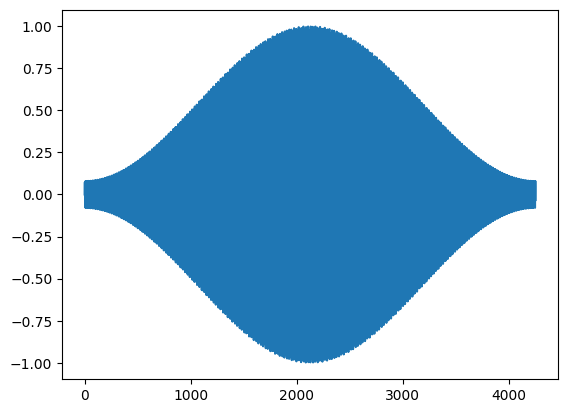

In [111]:
window = np.hamming(window_len) * np.sin(np.linspace(0, window_len, window_len))
plt.plot(window)

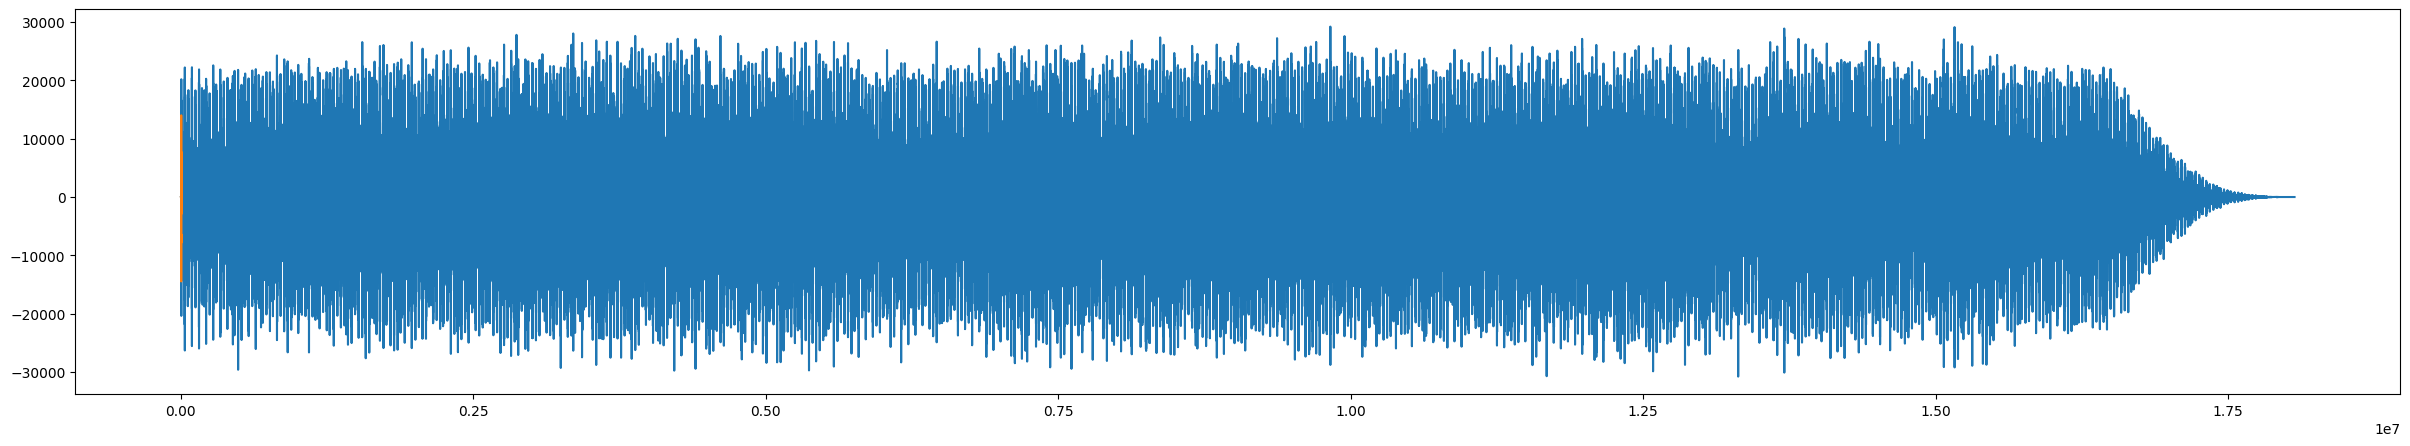

In [112]:
windowed_audio = (window * audio[:window_len])

plt.figure(figsize=(30,5))
plt.plot(audio)
plt.plot(windowed_audio)

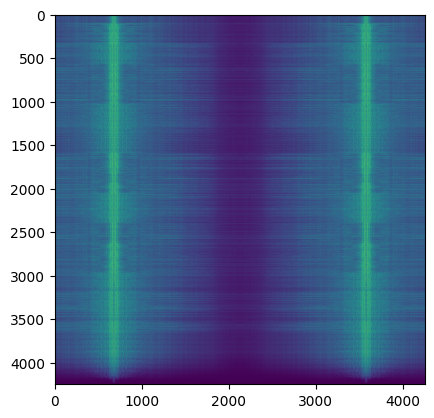

In [113]:
window_lens = [window_len*i for i in range(n_windows)]

fft_sequences = []

for n1, n2 in zip(window_lens, window_lens[1:]):
    audio_window = audio[n1:n2]
    convolved_audio = window * audio_window
    convolved_audio_fft = np.fft.fft(convolved_audio)
    mel_scale = 2595.0 * np.log10(1 + convolved_audio_fft/700.0)
    fft_sequences.append(mel_scale)
    
fft_sequences = np.array(fft_sequences)
plt.imshow(np.abs(fft_sequences))